In [14]:
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
%load_ext autoreload
%autoreload 2

import pickle
from tqdm import tqdm

from EKFNet import EKFNet_layers 
from EKFNet import EKFNet 
from EKFNet import EKF_solver
from EKFNet import config

from EKFNet import uncertaintyNet


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#training_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving"
correcte_measurement_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_heading_corrected"
GT_data_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_GT"

training_data = pickle.load(open(correcte_measurement_file_name , 'rb'))
GT_data       = pickle.load(open(GT_data_file_name , 'rb'))

In [3]:
print("Total Length of the data ", len(training_data), len(GT_data))

Total Length of the data  934 934


In [4]:
training_detection    = training_data[0:600]
validation_detection  = training_data[600:800]
test_detection        = training_data[800:934]

training_gt    = GT_data[0:600]
validation_gt  = GT_data[600:800]
test_gt        = GT_data[800:934]

training_data = {
    "data" : training_detection,
    "gt"   : training_gt
}

validation_data = {
    "data" : validation_detection,
    "gt"   : validation_gt
}

test_data = {
    "data" : test_detection,
    "gt"   : test_gt
}

Length of the filter states 40
Length of the detection  40


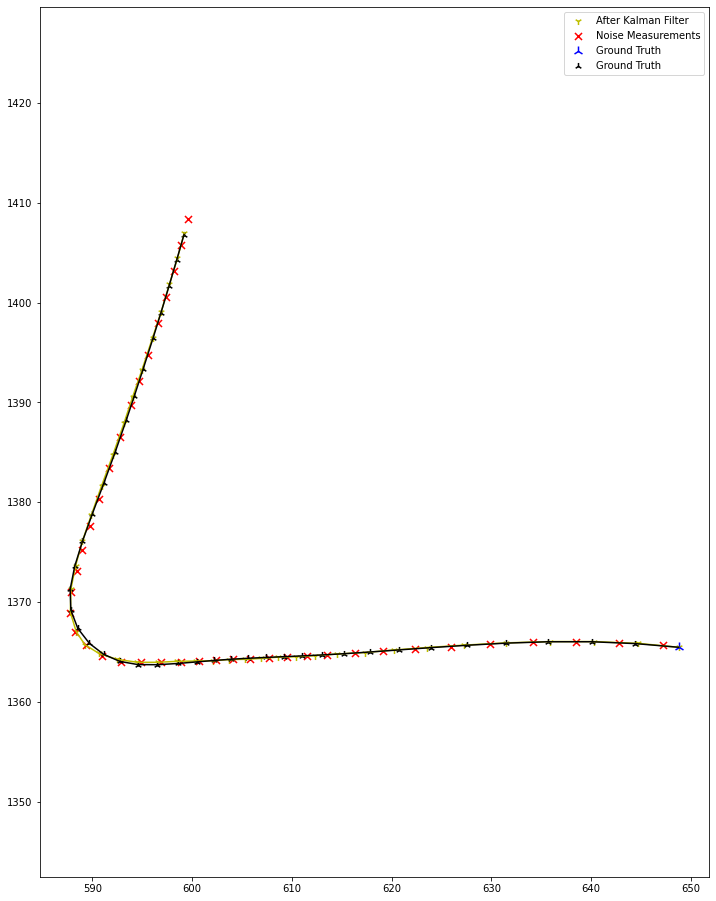

dR is 
 [[0.02 0.00 0.03 0.00 0.01]
 [0.01 0.01 -0.01 -0.00 -0.01]
 [-0.03 -0.03 16.88 -0.03 -0.02]
 [0.00 -0.00 -0.02 5.49 -0.02]
 [0.01 -0.00 0.00 -0.01 5.47]]
dQ_acc is 
 [[-0.01 -0.00]
 [-0.01 0.00]]
dQ_other is 
 [[0.03 -0.00 0.00 -0.01 0.00 -0.00 -0.01]
 [0.01 0.02 -0.00 -0.00 0.00 -0.00 -0.00]
 [-0.04 -0.01 -0.03 0.00 -0.02 -0.00 -0.00]
 [0.06 -0.03 0.01 -0.02 -0.01 0.00 0.00]
 [0.05 0.00 -0.02 -0.01 0.03 0.00 0.01]
 [-0.00 0.00 -0.00 0.00 0.00 -0.10 0.00]
 [-0.00 0.00 -0.00 0.00 -0.00 0.00 -0.09]]
RMS_state  :  0.8944563045682061
RMS_meas  :  0.7396931240762442
logLikelihood_state  :  6.824233438239881
logLikelihood_meas  :  11.02709226634252


In [79]:
uncertainty_net = uncertaintyNet.uncertaintyNet()

EKF_filter = EKFNet.EKFNet(network = uncertainty_net)
# TODO: working on the loaddata
testing_index = 100

EKF_filter.load_data_set(datasets = training_data['data'][testing_index], 
                         gt =  training_data['gt'][testing_index] )

EKF_filter.run_EKF_NET_forward()
EKF_filter.plot_overview()

EKF_filter.generate_grad()

# TODO: working on the total loss
loss = EKF_filter.totalLoss()
dR, dQ_acc, dQ_other = EKF_filter.run_backward()

print("dR is \n", dR)
print("dQ_acc is \n", dQ_acc)
print("dQ_other is \n", dQ_other)

for k, v in loss.items():
    print(k, " : " ,v)

# TODO: program the generating the grad
#EKF_filter.generate_fake_grad()

# TODO: working on the backward part
#EKF_filter.run_backward()

#EKF_filter.generate_grad()

In [ ]:

solver = EKF_solver.EKFSolver(
    data        = training_data,
    val_data    = validation_data, 
    test_data   = test_data,
    network     = uncertaintyNet.uncertaintyNet(),
    update_rule = config.config["update_rule"],
    lr_decay    = config.config["lr_decay"],
    batch_size  = config.config["batch_size"],
    num_epochs  = config.config["num_epochs"], 
    print_every = config.config["print_every"], 
    verbose     = config.config["verbose"],
    lr          = config.config["lr"]
)
#solver.draw()
solver.training()

  0%|          | 2/600 [00:00<00:46, 12.80it/s]

Building the new EKF solver
Begin training, initial setup Finish total training  600


 20%|██        | 122/600 [00:09<00:38, 12.33it/s]